In [ ]:
!pip install kaggle --upgrade
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -O ./spark-3.3.1-bin-hadoop3.tgz  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar zxvf ./spark-3.3.1-bin-hadoop3.tgz
!pip install findspark
!pip install pyspark
import findspark
import random
import pyspark
from pyspark.sql import functions as f
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/kaggle/working/spark-3.3.1-bin-hadoop3"
findspark.init()
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('treatmeant').getOrCreate()

In [3]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.ml import Pipeline

In [4]:
# Use Spark to read the training csv file.
data = spark.read.csv("/kaggle/working/df_maens.csv", header=True)
cols = data.columns[2:]

In [5]:
for col_name in cols:
    data = data.withColumn(col_name,col(col_name).cast("float"))

In [7]:
assembler = VectorAssembler(inputCols=data.columns[2:], outputCol="features",handleInvalid="keep")
model = KMeans(k=2, seed=1)
pipeline = Pipeline(stages=[assembler, model])

In [8]:
pipeline = pipeline.fit(data)
preds = pipeline.transform(data)

In [9]:
preds.toPandas()

,family,variant,avg(area),avg(bottomLeftY),avg(stddevY),avg(bottomLeftX),avg(advance),avg(topRightX),avg(stddevX),avg(meanX),avg(topRightY),avg(meanY),features,prediction
0,Open Sans,BoldItalic,786987.062500,-25.371252,402.766541,27.394142,1131.986938,1162.851807,277.253510,578.924744,1437.416016,688.063232,"[786987.0625, -25.371252059936523, 402.7665405...",0
1,Open Sans,Bold,808166.187500,-22.480392,401.696899,61.462566,1197.008789,1133.845825,282.466736,584.060608,1436.099854,687.425110,"[808166.1875, -22.480392456054688, 401.6968994...",0
2,Open Sans,ExtraBold,998582.312500,-26.555258,400.136932,48.211124,1239.720215,1188.848511,293.845490,605.300720,1444.377930,689.722839,"[998582.3125, -26.55525779724121, 400.13693237...",0
3,Open Sans,ExtraBoldItalic,976825.312500,-29.745150,402.366150,15.239154,1189.679688,1227.745972,290.015442,603.327881,1446.019409,691.657349,"[976825.3125, -29.745149612426758, 402.3661499...",0
4,Open Sans,Light,309069.781250,-12.800357,411.501007,77.606064,1069.699097,986.474670,262.903290,520.786499,1419.337769,683.268494,"[309069.78125, -12.8003568649292, 411.50100708...",1
5,Open Sans,LightItalic,303654.843750,-15.065256,411.730377,50.256039,1025.611938,1038.384521,264.720245,530.705688,1419.728149,683.340332,"[303654.84375, -15.065256118774414, 411.730377...",1
6,Open Sans,Italic,468389.750000,-18.329805,407.268982,45.273785,1050.295166,1072.330688,264.750519,544.384949,1425.460815,684.111328,"[468389.75, -18.329805374145508, 407.268981933...",0
7,Open Sans,Medium,564147.750000,-17.492870,405.242004,70.886810,1132.866699,1059.207642,270.836060,552.398682,1427.367188,684.554993,"[564147.75, -17.492870330810547, 405.242004394...",0
8,Open Sans,MediumItalic,550099.500000,-20.037918,405.773224,41.002029,1070.833374,1094.745117,267.339142,552.982117,1428.538818,684.883301,"[550099.5, -20.037918090820312, 405.7732238769...",0
9,Open Sans,Regular,479893.656250,-15.882353,406.970001,73.748665,1111.331543,1034.270142,267.530151,541.785400,1424.337769,683.997192,"[479893.65625, -15.882352828979492, 406.970001...",0


<AxesSubplot:title={'center':'Principal component analysis (PCA) means df VS Clusters'}, xlabel='0', ylabel='1'>

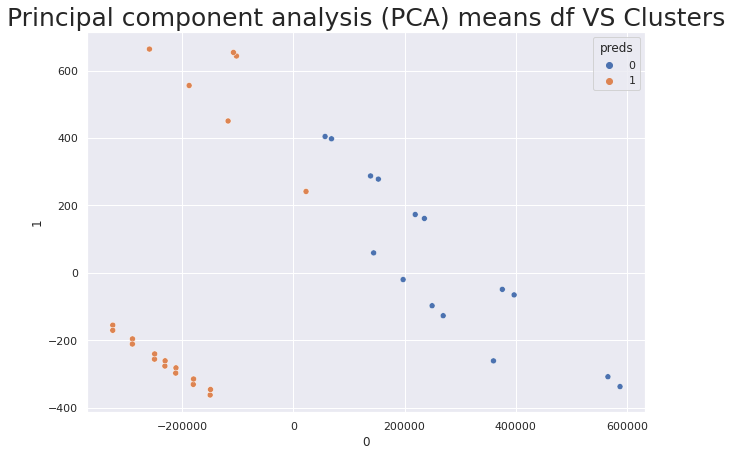

In [23]:
from sklearn.decomposition import PCA
df = preds.toPandas()
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df[cols]))
df_pca['preds'] = preds.toPandas()['prediction']
df[0] = df_pca[0]
df[1] = df_pca[1]
df['preds'] = df_pca['preds']

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize = (10, 7))
plt.title('Principal component analysis (PCA) means df VS Clusters', fontdict={'fontsize': 25})
sns.scatterplot(data=df, x=0, y=1, hue="preds", legend="full")